# Partie 1

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
from tensorflow.keras.datasets import imdb

# On limite ici le vocabulaire à 10 000 mots les plus fréquents dans le dataset
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Affichage des dimensions des ensembles de données
print("Nombre d'exemples dans l'ensemble d'entraînement :", len(x_train))
print("Nombre d'exemples dans l'ensemble de test :", len(x_test))

# Exemple d'un avis et de son étiquette
print("Exemple d'avis (tokenisé) :", x_train[0])
print("Étiquette correspondante :", y_train[0])

# Les étiquettes sont binaires : 0 pour avis négatif, 1 pour avis positif
label_mapping = {0: "Négatif", 1: "Positif"}
print("Étiquette interprétée :", label_mapping[y_train[0]])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Nombre d'exemples dans l'ensemble d'entraînement : 25000
Nombre d'exemples dans l'ensemble de test : 25000
Exemple d'avis (tokenisé) : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 5

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Télécharger et charger les données IMDB
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Récupérer l'index des mots pour convertir les séquences tokenisées en texte
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    """Décoder une revue encodée en texte."""
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Convertir les séquences numériques en texte pour le prétraitement
x_train_text = [decode_review(sequence) for sequence in x_train]
x_test_text = [decode_review(sequence) for sequence in x_test]

# Nettoyage et prétraitement des textes
def preprocess_text(text):
    """Nettoyer et prétraiter le texte."""
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    return text

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train_cleaned = [preprocess_text(review) for review in x_train_text]
x_test_cleaned = [preprocess_text(review) for review in x_test_text]

# Tokenisation des textes
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_cleaned)

x_train_tokenized = tokenizer.texts_to_sequences(x_train_cleaned)
x_test_tokenized = tokenizer.texts_to_sequences(x_test_cleaned)

# Conversion en représentation TF-IDF
vectorizer = TfidfVectorizer(max_features=vocab_size)

# Vectoriser les textes
x_train_tfidf = vectorizer.fit_transform(x_train_cleaned).toarray()
x_test_tfidf = vectorizer.transform(x_test_cleaned).toarray()

# Affichage des résultats
print("Exemple de texte nettoyé et prétraité :", x_train_cleaned[0])
print("Exemple de représentation TF-IDF :", x_train_tfidf[0])

Exemple de texte nettoyé et prétraité :  this film was just brilliant casting location scenery story direction everyones really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boys that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [6]:
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_tfidf, y_train, test_size=0.2, random_state=42
)

# Création d'un modèle SVC avec un noyau linéaire
svc_model = SVC(kernel='linear', random_state=42)

svc_model.fit(x_train_split, y_train_split)

print("Exemple de texte nettoyé et prétraité :", x_train_cleaned[0])
print("Exemple de représentation TF-IDF :", x_train_tfidf[0])
print("Précision sur l'ensemble de validation :", svc_model.score(x_val_split, y_val_split))

Exemple de texte nettoyé et prétraité :  this film was just brilliant casting location scenery story direction everyones really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boys that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_pred = svc_model.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Précision du modèle sur l'ensemble de test : {accuracy:.4f}")

print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))

Précision du modèle sur l'ensemble de test : 0.8779

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Matrice de confusion :
[[11021  1479]
 [ 1573 10927]]


Le modèle SVM a obtenu une précision de 87,79 % sur l'ensemble de test, indiquant une bonne performance globale. Le rapport de classification montre des scores équilibrés entre les deux classes (positif et négatif) avec une précision, un rappel et un F1-score autour de 0,88 pour chaque classe, suggérant une capacité du modèle à prédire correctement les sentiments sans biais significatif. La matrice de confusion révèle 11 021 prédictions correctes pour la classe négative et 10 927 pour la classe positive, avec un nombre modéré d'erreurs (1 479 faux positifs et 1 573 faux négatifs), ce qui reflète une robustesse globale dans le traitement des données.

# Partie 2

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [ ]:
df = pd.read_csv("imdb_dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [37]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [38]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
# Nettoyage des textes (convertir en minuscules, supprimer la ponctuation, etc.)
df['review'] = df['review'].str.lower().str.replace('[^\w\s]', '', regex=True)

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Admin\AppData\Local\Temp\ipykernel_17784\771012313.py:3: SyntaxWarning: invalid escape sequence '\w'
  df['review'] = df['review'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [39]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [40]:
# Tokenisation
tokenizer = Tokenizer(num_words=10000)  # Garder les 10 000 mots les plus fréquents
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

# Padding des séquences pour une longueur uniforme
max_length = 200
X = pad_sequences(sequences, maxlen=max_length)

# Cibles
y = df['sentiment'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Création du modèle CNN
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Entraînement
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.7101 - loss: 0.5263 - val_accuracy: 0.8751 - val_loss: 0.2924
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9105 - loss: 0.2282 - val_accuracy: 0.8820 - val_loss: 0.2733
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9543 - loss: 0.1391 - val_accuracy: 0.8840 - val_loss: 0.2915
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9793 - loss: 0.0753 - val_accuracy: 0.8850 - val_loss: 0.3345
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9920 - loss: 0.0350 - val_accuracy: 0.8763 - val_loss: 0.3943
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9982 - loss: 0.0142 - val_accuracy: 0.8814 - val_loss: 0.4523
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9996 - loss: 0.0052 - val_accuracy: 0.8780 - val_loss: 0.5177
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 1.0000 -

In [44]:
# Évaluation sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8739 - loss: 0.6596
Précision sur l'ensemble de test : 0.8725


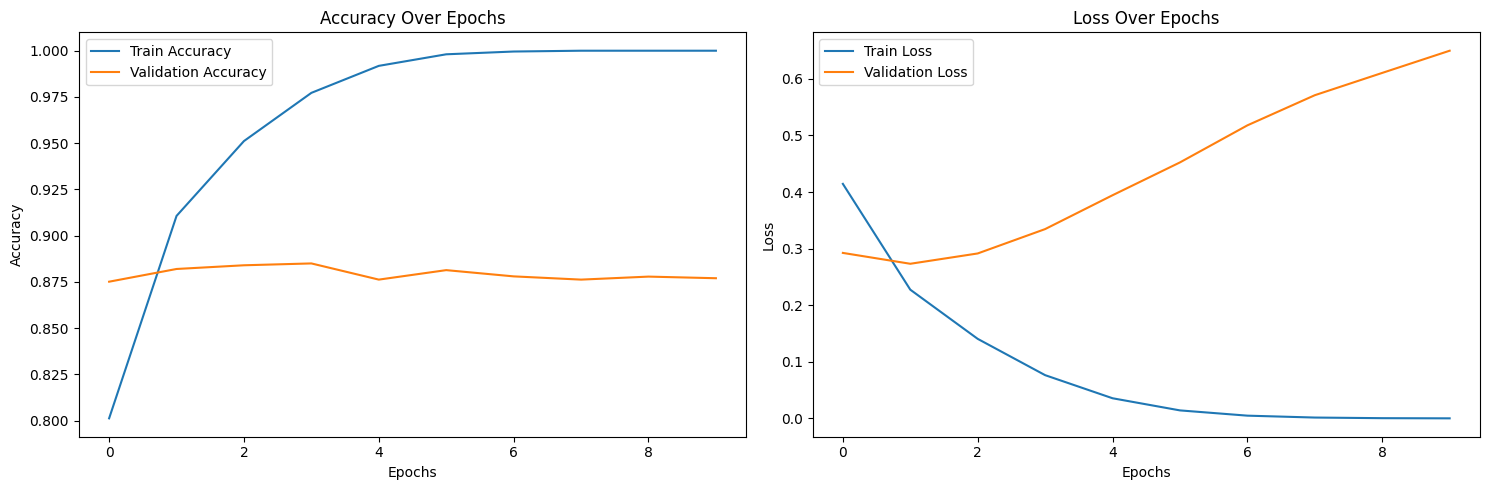

In [47]:
import matplotlib.pyplot as plt

# Courbe de précision
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbe de perte
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Le modèle atteint une précision satisfaisante de 87,25 % sur l'ensemble de test, indiquant une bonne performance pour l'analyse de sentiments. Cependant, l'écart observé entre la perte d'entraînement, qui diminue régulièrement, et la perte de validation, qui augmente après quelques époques, montre un problème de surapprentissage . Bien que la précision de validation soit stable (~87 %), des techniques comme la régularisation (dropout, L2) ou l'arrêt anticipé pourraient améliorer la généralisation du modèle sur de nouvelles données.